# Investigating Fandango Movie Ratings

## Introduction

In this project, we'll be building on the a piece of data journalism that Walt Hickey produced in 2015, which found strong evidence to suggest that Fandango's, a movie review site, rating system was biased and dishonest. We will analyze recent movie ratings data from Fandango to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## The datasets

The two data sets we have access to and will be working with are:
- The 2015 data Walt Hickey analyzed, which he made available publicly on his GitHub
- Movie ratings data for movies released in 2016 and 2017

In [1]:
import pandas as pd

# Reading the csv files

fandango_score_comparison = pd.read_csv("fandango_score_comparison.csv")
print(fandango_score_comparison.shape)
print(fandango_score_comparison.columns)
fandango_score_comparison.head()

(146, 22)
Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
movie_ratings_16_17 = pd.read_csv("movie_ratings_16_17.csv")
print(movie_ratings_16_17.shape)
print(movie_ratings_16_17.columns)
movie_ratings_16_17.head()

(214, 15)
Index(['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango',
       'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore',
       'nr_imdb', 'nr_tmeter', 'nr_audience'],
      dtype='object')


,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


The 2015 file has 145 entries with 22 attributes collected. The 2016-2017 file has over 200 records with only 15 attributes tracked. 

We will select the columns that we are interested in working with:

In [3]:
cols = ['FILM', 
        'Fandango_Stars', 
        'Fandango_Ratingvalue', 
        'Fandango_votes', 
        'Fandango_Difference']

fandango_old = fandango_score_comparison[cols]
fandango_old.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [4]:
cols = ['movie',
        'year',
       'fandango']

fandango_new = movie_ratings_16_17[cols]
fandango_new.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


## Evaluating the data sets

The goal we started this project with was to determine whether there has been any change in Fandango's rating system after Hickey's analysis. 

In order to be able to conduct this analysis, we'd need a representative population of all the movie ratings stored on the Fandango website during the two periods of time that we'd like to compare. 

So are these datasets representative? Reading the README.md files of both repositories, we find that the samplings were not random:
- In the first dataset, only movies with at least 30 fan ratings on the Fandango website were included
- In the second dataset, only movies with a "considerable number of votes and reviews" were included 

Both datasets are skewed and are not representative of the entire population (which should include all movies, no matter how popular or good). 

## Changing the goal of the analysis

Rather than collecting new data, we can tweak our goal.

**Original goal:** To determine whether there has been any change in Fandango's rating system after Hickey's article.

**New goal:** To determine whether there is any difference between Fandango's ratings for popular movies in 2015 vs in 2016. 

## Samples for the analysis

We will need data that speaks to two populations of interest:
1. All Fandango's ratings for popular movies released in 2015
2. All Fandango's ratings for popular movies released in 2016

We will define "popular" by using Hickey's benchmark of if a movie has 30 or more fan ratings on Fandango's website.

We know that the first dataset is already filtered by this benchmark. We need to investigate the second dataset further.

In [5]:
# First dataset - all movies have at least 30 fan ratings
sum(fandango_old['Fandango_votes'] < 30)

0

The second dataset does not have information about the number of fan ratings. We'd need to manually check a random sample to make sure the dataset is representative.

In [6]:
# Taking a random sample of the second dataset to see how many ratings the movies have
fandango_new.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


As of April 2018, these are the fan ratings we found:

| Movie | Fan ratings |
| --- | --- |
| Mechanic: Resurrection | 2247 |
| Warcraft	| 7271 |
| Max Steel	| 493 |
| Me Before You	| 5263 |
| Fantastic Beasts and Where to Find Them	| 13400 |
| Cell	| 17 |
| Genius	| 127 |
| Sully	| 11877 |
| A Hologram for the King	| 500 |
| Captain America: Civil War	| 35057 |

All except for one (i.e. 90%) of the movies in our sample are popular. This is enough and we move forward with a bit more confidence.

Let's investigate the years to make sure the movies were released in 2015/2016.

In [7]:
fandango_old.columns

Index(['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
       'Fandango_Difference'],
      dtype='object')

In [8]:
fandango_old.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


While the table does not have a standalone "Year" column, we can extract from the "FILM" name column.

In [9]:
fandango_old['year'] = fandango_old['FILM'].str[-5:-1]
fandango_old[['FILM','year']].head()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,FILM,year
0,Avengers: Age of Ultron (2015),2015
1,Cinderella (2015),2015
2,Ant-Man (2015),2015
3,Do You Believe? (2015),2015
4,Hot Tub Time Machine 2 (2015),2015


In [10]:
# Check to see which years the movies were released
fandango_old.year.value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [11]:
# We will remove the 2014 references
fandango_2015 = fandango_old[fandango_old['year'] == '2015'].copy()
fandango_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [12]:
fandango_2015.year.value_counts()

2015    129
Name: year, dtype: int64

In [13]:
# Moving onto the second dataset
fandango_new.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [14]:
fandango_new.year.value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [15]:
# Keeping only the 2016 references
fandango_2016 = fandango_new[fandango_new['year'] == 2016].copy()
fandango_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


In [16]:
fandango_2016.year.value_counts()

2016    191
Name: year, dtype: int64

## Initial analysis - Comparing shapes of the distribution of the two samples

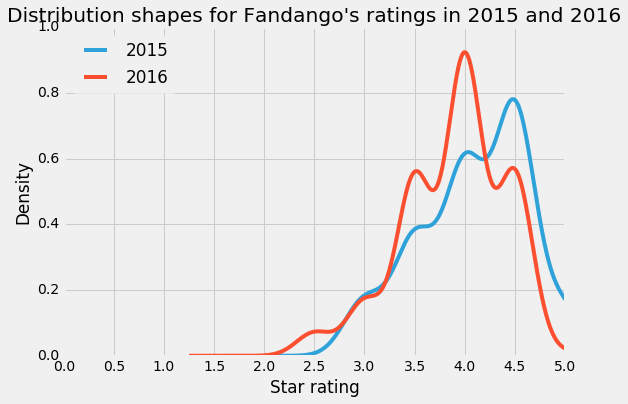

In [17]:
# Generating two kernel density plots to compare the distributions of the two samples

import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

# We will use the fivethirtyeight style
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8, 5.5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Distribution shapes for Fandango's ratings in 2015 and 2016")

plt.xlabel('Star rating')
plt.xlim(0,5)
plt.xticks(arange(0,5.1,0.5))
plt.show()

**Observation**: Although both distributions are both heavily skewed to the right, the 2016 distribution is shifted towards the left compared to the 2015 distribution. 

This leftward shift in the 2016 distribution suggests that there perhaps was a change in Fandango's ratings between the 2 years, and that the 2016 ratings were lower than those in 2015. 

## Diving deeper: Examining the frequency distributions of the two samples

Since the two datasets have different numbers of movies, we should normalise the tables and compare the relative frequency distributions. 

In [18]:
# 2015 frequency distribution
print("2015 Frequency Distribution")
print("----------------")
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index()

2015 Frequency Distribution
----------------


3.0    0.085271
3.5    0.178295
4.0    0.286822
4.5    0.379845
5.0    0.069767
Name: Fandango_Stars, dtype: float64

In [19]:
# 2016 frequency distribution
print("2016 Frequency Distribution")
print("----------------")
fandango_2016.fandango.value_counts(normalize = True).sort_index()

2016 Frequency Distribution
----------------


2.5    0.031414
3.0    0.073298
3.5    0.240838
4.0    0.403141
4.5    0.246073
5.0    0.005236
Name: fandango, dtype: float64

In [21]:
# Visualising these distributions with histograms
x = fandango_2015['Fandango_Stars'].value_counts(normalize = True)
y = fandango_2016['fandango'].value_counts(normalize = True)

In [36]:
combined = pd.concat([x,y], axis = 1)
cols = ['2015', '2016']
combined.columns = cols
combined = combined.fillna(0)
combined

,2015,2016
2.5,0.000000,0.031414
3.0,0.085271,0.073298
3.5,0.178295,0.240838
4.0,0.286822,0.403141
4.5,0.379845,0.246073
5.0,0.069767,0.005236


/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



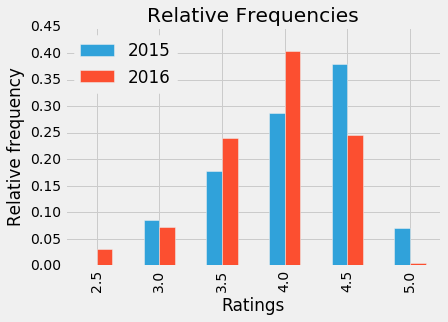

In [41]:
ax = combined.plot(y=["2015","2016"], kind="bar", title="Relative Frequencies")
ax.set_xlabel("Ratings")
ax.set_ylabel("Relative frequency")

The chart above shows that ratings for 2016 have gone down relative to those in 2015. While almost 7% of movies were rated 5 stars in 2015, almost none were rated the same in 2016. In contrast, while no movies were ratessd under 3 stars in 2015, 3% of movies were rated with such a low score in 2016.

## Comparing summary statistics

We'll take a look at a few summary statistics to more properly determine the direction of change.

In [43]:
# Mean
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

# Median
median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

# Mode
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

# Compute summary table
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


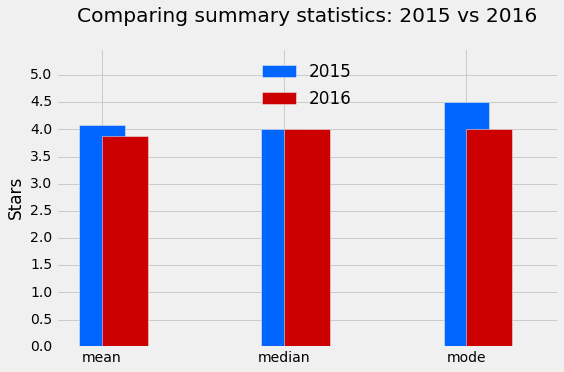

In [44]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

Although the medians are the sames, the mean and mode of 2016 ratings are lower than those of 2015s. This confirms the direction of the d